In [1]:
from jaeger_parser import JaegerParser
from graphviz import Digraph

In [2]:
def draw_graph(tree, name, rule=[]):
    dot = Digraph(name)
    tree.todot(dot, rule)
    return dot

In [6]:
p = JaegerParser("trace.json")
root = p.process()


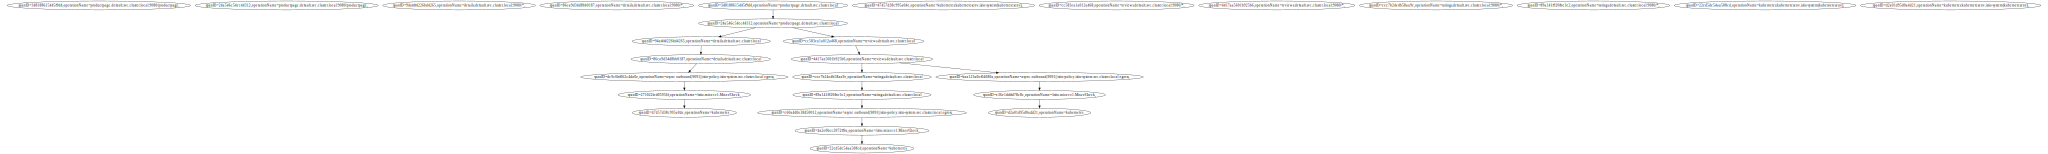

In [7]:
rules_raw = {
    #'serviceName' : 'lambda x : x',
    'spanID' : 'lambda x : x',
    'operationName' : 'lambda x : x',
}

draw_graph(root.transform(rules_raw), "raw2")
#t = p.root.transform(rules_raw)
#p.root.labels

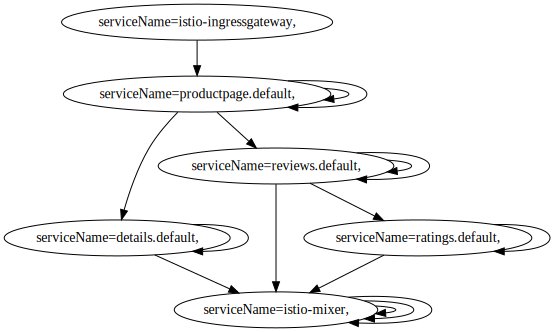

In [9]:
rules_simple = { 'serviceName' : 'lambda x : x'}
draw_graph(root.transform(rules_simple), "simple")

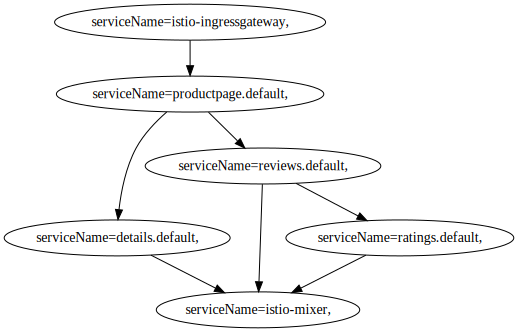

In [11]:
draw_graph(root.transform(rules_simple).collapse(), "simple")

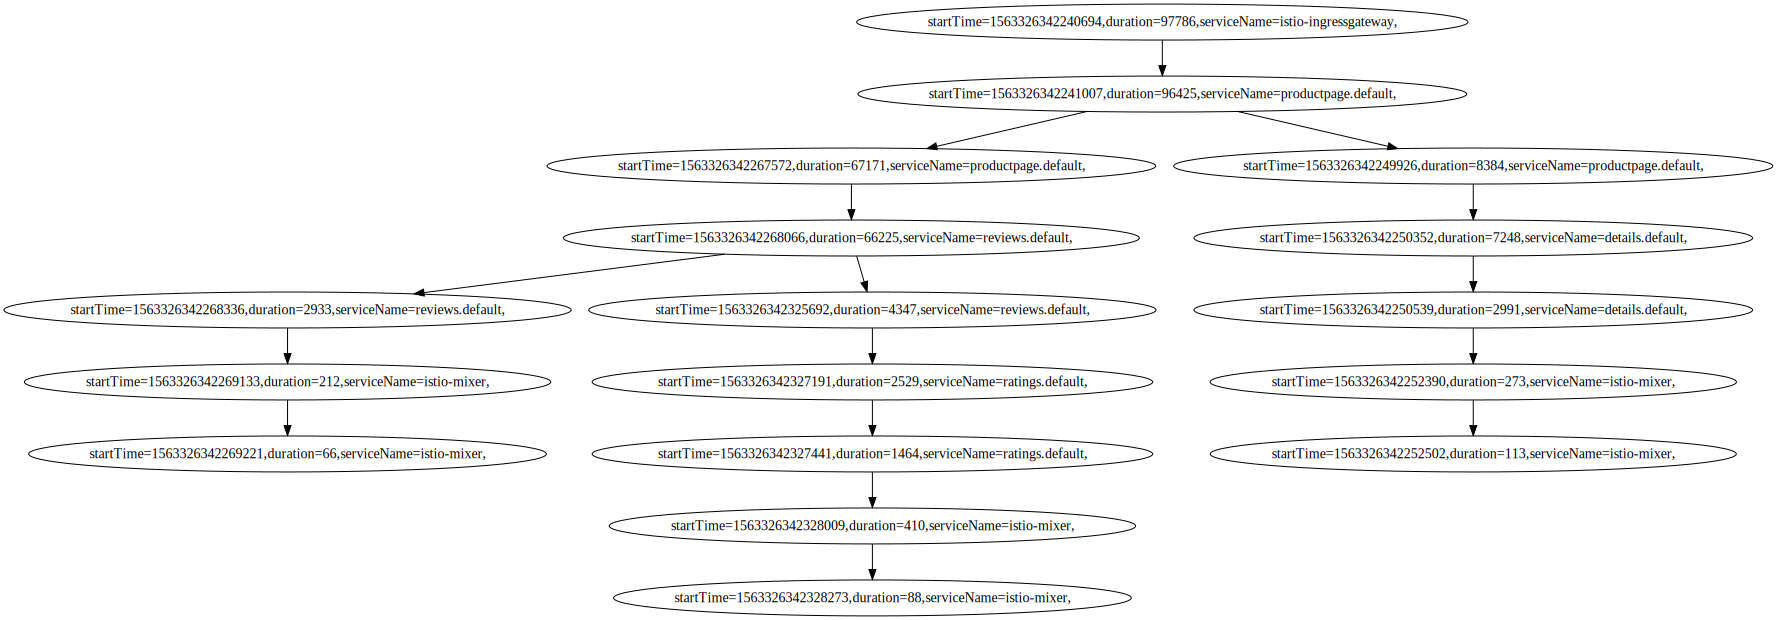

In [12]:
rules_timing = { 'serviceName' : 'lambda x : x', 'startTime': 'lambda x : x', 'duration' : 'lambda x : x'}
draw_graph(root.transform(rules_timing), 'timing')

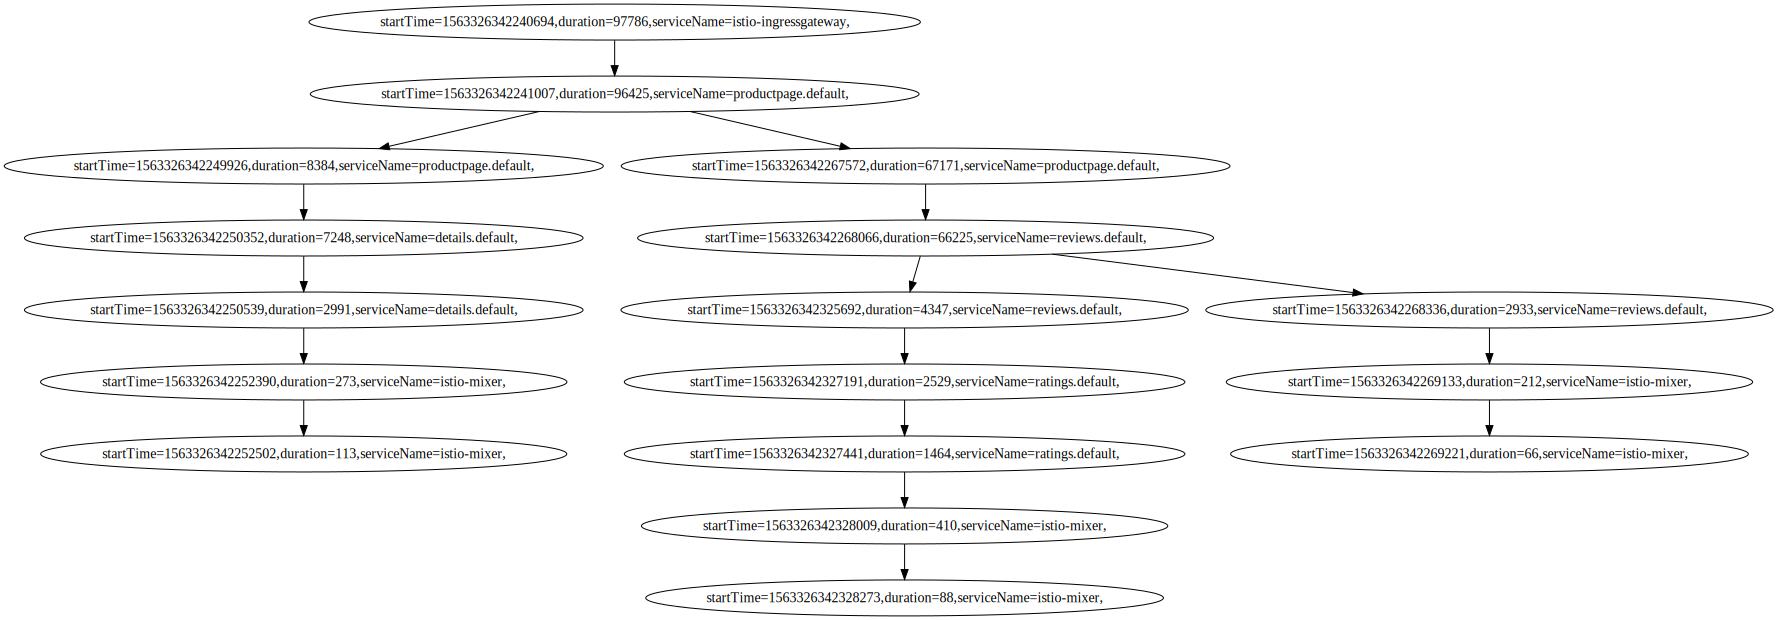

In [13]:
draw_graph(root.transform(rules_timing).collapse(), 'timing')

nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']


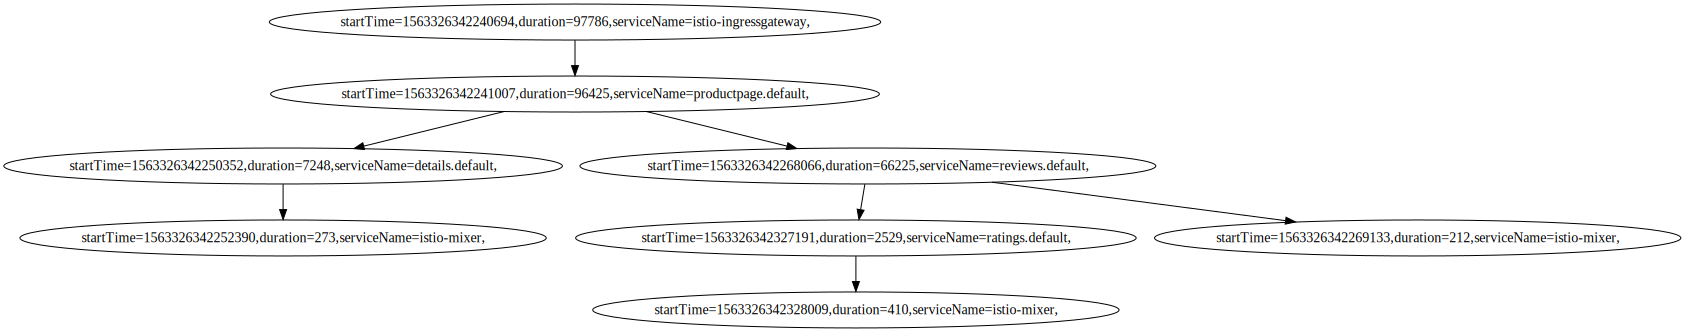

In [14]:
draw_graph(root.transform(rules_timing).collapse(['serviceName']), 'timing')

In [16]:
root.transform(rules_timing).collapse(['serviceName']).formula(['serviceName'])

nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
item is (<canonical_tree.CallGraph object at 0x10f868810>, 'START', 1563326342241007), type <class 'tuple'>
nay startTime with rule ['serviceName']
nay duration with rule ['serviceName']
item is (<canonical_tree.CallGraph object at 0x10f868810>, 'END', 1563326342337432), type <class 'tuple'>
nay startTime with rule ['serviceName']
nay duration with rule ['serviceNam

{'serviceName=istio-ingressgateway,': [{'faults': ['serviceName=productpage.default,'],
   'before-anchor': 'serviceName=productpage.default,',
   'event': 'START'},
  {'faults': ['serviceName=productpage.default,'],
   'before-anchor': 'serviceName=productpage.default,',
   'event': 'END'}],
 'serviceName=productpage.default,': [{'faults': ['serviceName=details.default,',
    'serviceName=reviews.default,'],
   'before-anchor': 'serviceName=details.default,',
   'event': 'START'},
  {'faults': ['serviceName=details.default,', 'serviceName=reviews.default,'],
   'before-anchor': 'serviceName=details.default,',
   'event': 'END'},
  {'faults': ['serviceName=reviews.default,'],
   'before-anchor': 'serviceName=reviews.default,',
   'event': 'START'},
  {'faults': ['serviceName=reviews.default,'],
   'before-anchor': 'serviceName=reviews.default,',
   'event': 'END'}],
 'serviceName=details.default,': [{'faults': ['serviceName=istio-mixer,'],
   'before-anchor': 'serviceName=istio-mixer,'